# **Letter classification study using the K Nearest Neighbors model**

## **Introduction**

This is the main study of a letter classification using the EMNIST letters database avaiable in https://www.nist.gov/itl/products-and-services/emnist-dataset

## **Reading the dataset**

This part contains the functions to read the dataset saved in the ".npy" files to use it in the machine learning algorithm created

In [1]:
import numpy as np

In [2]:
def transform_dataset(dataset):
    labels = []
    letters = []
    for row in dataset:
        labels.append(row[-1])
        letters.append(np.array(row[:-1]))
           
    return labels, letters      

In [5]:
%%time

print("Loading Train dataset...")
train_array = np.load('./../train.npy')
label_train, img_train = transform_dataset(train_array)
print("Finished loading train dataset!")

Loading Train dataset...
Loading Test dataset...
Loading Validation dataset...
Finished loading!
CPU times: user 573 ms, sys: 459 ms, total: 1.03 s
Wall time: 1.03 s


In [ ]:
%%time

print("Loading Test dataset...")
test_array = np.load('./../test.npy')
label_test, img_test = transform_dataset(test_array)
print("Finished loading test dataset!")

In [ ]:
%%time

print("Loading Validation dataset...")
validation_array = np.load('./../validation.npy')
label_valdation, img_validation = transform_dataset(validation_array)
print("Finished loading validation dataset!")

## **K-Nearest Neighbors algorithm created**

This section is presented the algorithme developped.

In [ ]:
import kk
from sklearn.metrics import accuracy_score

In [ ]:
N = 2000
M = 2000/8
train_x = img_train[:N]
train_y = label_train[:N]
validation_x = img_validation[:M]
validation_y = label_validation[:M]

In [ ]:
def knn_train(N, n_neighbors):  
    #Predict the results of the train dataset
    predicted = kk.kNearestNeighbor(train_x, train_y, train_x, train_y, n_neighbors)

    print("The train accuracy is: " + str(accuracy_score(train_y, predicted)))
    
    return predicted

In [6]:
def knn_validation(N, n_neighbors):
    #Predict the results of the test dataset
    predicted = kk.kNearestNeighbor(train_x, train_y, validation_x, validation_y, n_neighbors)

    print("The validation accuracy is: " + str(accuracy_score(validation_y, predicted)))
    
    return predicted

In [ ]:
%%time 

predicted_train = knn_train(2000, 5)

In [ ]:
%%time 

predicted_validation = knn_validation(2000, 5)


## **Visualizing the study**

This part consist a better visualization of the study done to better analyse the classifier

In [ ]:
import matplotlib.pyplot as plt 
import itertools
from sklearn.metrics import confusion_matrix
import string

In [ ]:
def plot_confusion_matrix(data_x, data_y, Ypred):
    classes = string.ascii_uppercase
    
    # Computation of confusion matrix on testing set
    cm = confusion_matrix(data_y, Ypred)
    
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title('Confusion matrix')
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

In [ ]:
#Plot confusion matrix for analyse the classification
plt.figure(figsize=(12,6))
plt.subplot(121)
plot_confusion_matrix(train_x, train_y, predicted_train)

plt.subplot(122)
plot_confusion_matrix(validation_x, validation_y, predicted_validation)
plt.show()

## Hyperparameters study

This part consist on making a study of the hyperparameters of the KNN model

In [ ]:
# Model training and accuracy computation for different k values

def tuning_parameter_new_knn(start_value, end_value, N):
    values = [i for i in range(start_value, end_value)]
    accs_train = []
    accs_validation  = []

    for neighbors in values:

        prediction_train = []
        prediction_validation = []

        prediction_train = kk.kNearestNeighbor(train_x, train_y, train_x, train_y, neighbors)
        accs_train.append(accuracy_score(train_y, prediction_train))

        prediction_validation = kk.kNearestNeighbor(train_x, train_y, validation_x, validation_y, neighbors)
        accs_validation.append(accuracy_score(validation_y, prediction_validation))

    plt.figure(figsize=(16, 8))

    print("Optimal number for k: " + str(values[np.argmax(accs_validation)]))

    # Draw accuracies as a function of the depth for both trainin and testing sets
    plt.plot(values, accs_train, label = 'Train Accuracy')
    plt.plot(values, accs_validation,  label = 'Validation Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Number of k neighbors')
    plt.legend()
    plt.xticks(values)
    plt.show()  

Optimal number for k: 1


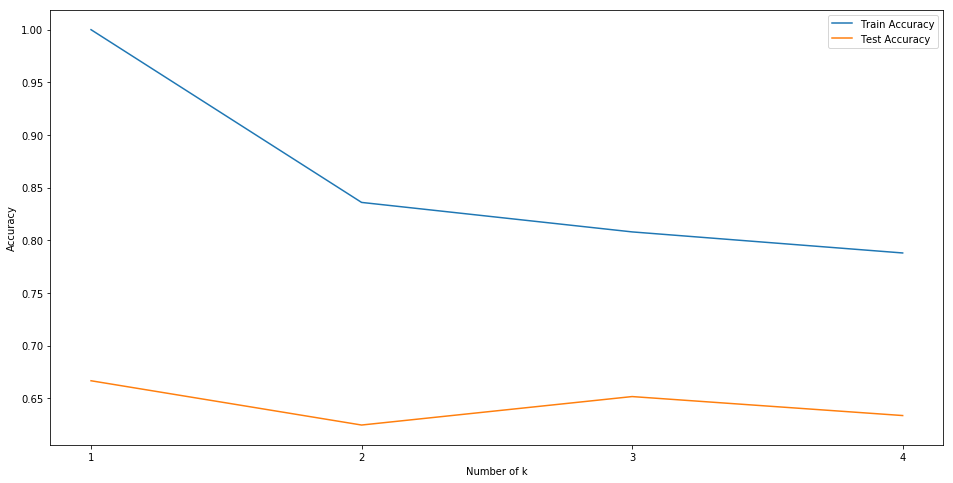

CPU times: user 4min 27s, sys: 292 ms, total: 4min 27s
Wall time: 4min 27s


In [19]:
%%time 

tuning_parameter_new_knn(2, 5, 2000)

## **Best K-Nearest Neighbors model**

Finally after making the study of the hyperparameters we make another study to see the gain in performance

In [ ]:
%%time 

best_predicted_train = knn_train(2000, 5)

In [ ]:
W = 2000/6
test_x = img_train[:W]
test_y = label_train[:W]


In [ ]:
def knn_test(N, n_neighbors):  
    #Predict the results of the train dataset
    predicted = kk.kNearestNeighbor(train_x, train_y, test_x, test_y, n_neighbors)

    print("The train accuracy is: " + str(accuracy_score(test_y, predicted)))
    
    return predicted

In [ ]:
%%time 

predicted_test = knn_test(2000, 5)

In [ ]:
#Plot confusion matrix for analyse the classification
plt.figure(figsize=(12,6))
plt.subplot(121)
plot_confusion_matrix(train_x, train_y, best_predicted_train)

plt.subplot(122)
plot_confusion_matrix(test_x, test_y, predicted_test)
plt.show()